In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'
url='https://drive.google.com/file/d/1v6bObg99C_8qlY4E4srsdqtgV8LSN1wG/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22,32,35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,2.01301E+11,4,sign - erect,1/2/2013,1539,3,4141,NaN,Geary,Bl,NaN,NaN,erect 1 illuminated monument sign.,complete,4/29/2014,1/2/2013,7/15/2013,4/29/2014,NaN,NaN,4.0,NaN,NaN,NaN,7/10/2014,10000.0,10000.0,clinics-medic/dental,0.0,NaN,NaN,2.0,NaN,1.0,constr type 1,NaN,NaN,NaN,1.0,Inner Richmond,94118.0,POINT (-122.46370669566068 37.78043489558403),1.292120e+12
1,2.01301E+11,4,sign - erect,1/2/2013,1095,5,2425,NaN,Geary,Bl,NaN,NaN,erect 1 illuminated monument sign.,complete,5/2/2014,1/2/2013,7/8/2013,5/2/2014,NaN,NaN,4.0,NaN,NaN,NaN,7/3/2014,10000.0,10000.0,hospital,0.0,NaN,NaN,2.0,NaN,1.0,constr type 1,NaN,NaN,NaN,2.0,Lone Mountain/USF,94115.0,POINT (-122.44313634259956 37.7823149205132),1.292120e+11
2,M364247,8,otc alterations permit,1/2/2013,499,001A,2757,NaN,Polk,St,NaN,NaN,street space,issued,1/2/2013,1/2/2013,1/2/2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Russian Hill,94109.0,POINT (-122.42331798344719 37.80216598051278),1.292120e+11
3,2.01301E+11,8,otc alterations permit,1/2/2013,1230,17,580,NaN,Cole,St,NaN,NaN,reroofing,issued,1/2/2013,1/2/2013,1/2/2013,NaN,NaN,NaN,2.0,2.0,NaN,NaN,12/28/2013,18000.0,18000.0,apartments,7.0,apartments,7.0,0.0,NaN,5.0,wood frame (5),5,wood frame (5),NaN,5.0,Haight Ashbury,94117.0,POINT (-122.45008165265168 37.76982351216478),1.292160e+12
4,2.01301E+11,8,otc alterations permit,1/2/2013,1230,17,588,NaN,Cole,St,NaN,NaN,reroofing,issued,1/2/2013,1/2/2013,1/2/2013,NaN,NaN,NaN,2.0,2.0,NaN,NaN,12/28/2013,18000.0,18000.0,apartments,7.0,apartments,7.0,0.0,NaN,5.0,wood frame (5),5,wood frame (5),NaN,5.0,Haight Ashbury,94117.0,POINT (-122.45008165265168 37.76982351216478),1.292160e+12


In [ ]:
df.describe()

,Permit Type,Street Number,Unit,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Existing Units,Proposed Units,Plansets,Existing Construction Type,Supervisor District,Zipcode,Record ID
count,198851.000000,198851.000000,29444.000000,156234.000000,156157.000000,1.609590e+05,1.953700e+05,147418.000000,148050.000000,161556.000000,155654.000000,197164.000000,198830.000000,1.988510e+05
mean,7.519047,1121.692991,78.565514,5.704338,5.743198,1.682614e+05,1.490968e+05,15.676473,16.516947,1.218618,4.073496,5.538283,94115.512880,1.162658e+12
std,1.462244,1135.706564,327.351851,8.610802,8.609680,3.624377e+06,3.615488e+06,74.573443,75.309559,0.978420,1.585405,2.887444,9.292052,4.917330e+11
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,94102.000000,1.293532e+10
25%,8.000000,235.000000,0.000000,2.000000,2.000000,3.300000e+03,1.000000e+00,1.000000,1.000000,0.000000,3.000000,3.000000,94109.000000,1.308650e+12
50%,8.000000,710.000000,0.000000,3.000000,3.000000,1.100000e+04,8.000000e+03,1.000000,2.000000,2.000000,5.000000,6.000000,94114.000000,1.371990e+12
75%,8.000000,1700.000000,1.000000,4.000000,4.000000,3.518700e+04,3.000000e+04,4.000000,4.000000,2.000000,5.000000,8.000000,94122.000000,1.435250e+12
max,8.000000,8400.000000,6004.000000,78.000000,78.000000,5.379586e+08,7.805000e+08,1907.000000,1911.000000,6.000000,5.000000,11.000000,94158.000000,1.626240e+12


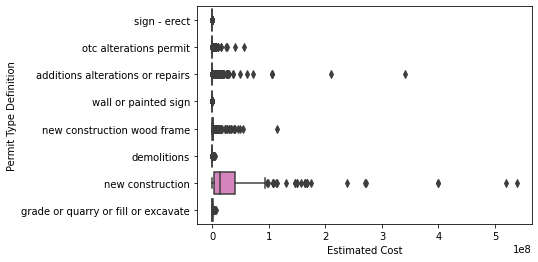

In [ ]:
# kiểm tra dữ liệu outlier giá dự tính so với loại giấy phép
sns.boxplot(x='Estimated Cost',y='Permit Type Definition',data=df)
plt.xticks(fontsize =10)
plt.yticks(fontsize =10)
plt.savefig('PermitTypeDefinition_EstimateCost.png')

In [ ]:
#Thống kê số phần tử null trong các cột
df.dtypes
df.isnull().sum().sort_values(ascending=False)

TIDF Compliance                           198849
Voluntary Soft-Story Retrofit             198816
Unit Suffix                               196889
Street Number Suffix                      196493
First Construction Document Date          195024
Site Permit                               193416
Structural Notification                   191753
Fire Only Permit                          180017
Unit                                      169407
Completed Date                             84280
Existing Units                             51433
Proposed Units                             50801
Permit Expiration Date                     46571
Existing Construction Type                 43197
Existing Construction Type Description     43197
Proposed Construction Type Description     42988
Proposed Construction Type                 42987
Number of Proposed Stories                 42694
Number of Existing Stories                 42617
Proposed Use                               42257
Existing Use        

In [ ]:
# %phần tử null trong các cột
df.isnull().sum().sort_values(ascending=False)
for column in df.columns:
  percent=df[column].isnull().mean()
  print(f'{column}:{round(percent*100,3)}')

Permit Number:0.0
Permit Type:0.0
Permit Type Definition:0.0
Permit Creation Date:0.0
Block:0.0
Lot:0.0
Street Number:0.0
Street Number Suffix:98.814
Street Name:0.0
Street Suffix:1.393
Unit:85.193
Unit Suffix:99.013
Description:0.088
Current Status:0.004
Current Status Date:0.004
Filed Date:0.004
Issued Date:4.858
Completed Date:42.383
First Construction Document Date:98.075
Structural Notification:96.43
Number of Existing Stories:21.432
Number of Proposed Stories:21.47
Voluntary Soft-Story Retrofit:99.982
Fire Only Permit:90.529
Permit Expiration Date:23.42
Estimated Cost:19.055
Revised Cost:1.751
Existing Use:20.589
Existing Units:25.865
Proposed Use:21.251
Proposed Units:25.547
Plansets:18.755
TIDF Compliance:99.999
Existing Construction Type:21.723
Existing Construction Type Description:21.723
Proposed Construction Type:21.618
Proposed Construction Type Description:21.618
Site Permit:97.267
Supervisor District:0.848
Neighborhoods - Analysis Boundaries:0.848
Zipcode:0.011
Location:

In [ ]:
#1. Clean data: drop column có phần tử null lớn hơn 90%
df.drop('TIDF Compliance', axis = 1, inplace=True)
df.drop('Voluntary Soft-Story Retrofit', axis = 1, inplace=True)
df.drop('Street Number Suffix', axis = 1, inplace=True)
df.drop('Unit Suffix', axis = 1, inplace=True)
df.drop('First Construction Document Date', axis = 1, inplace=True)
df.drop('Structural Notification', axis = 1, inplace=True)
df.drop('Fire Only Permit', axis = 1, inplace=True)
df.drop('Site Permit', axis = 1, inplace=True)

In [ ]:
#2. Clean data: thêm phần tử có tần suất xuất hiện nhiều nhất trong cột vào giá trị null từ 20->90%
mean = df['Unit'].mean()
df[df['Unit'].isnull()].fillna(mode, inplace=True)
mode = df['Completed Date'].mode()
df[df['Completed Date'].isnull()].fillna(mode, inplace=True)
mode = df['Number of Existing Stories'].mode()
df[df['Number of Existing Stories'].isnull()].fillna(mode, inplace=True)
mode = df['Number of Proposed Stories'].mode()
df[df['Number of Proposed Stories'].isnull()].fillna(mode, inplace=True)
mode = df['Permit Expiration Date'].mode()
df[df['Permit Expiration Date'].isnull()].fillna(mode, inplace=True)
mode = df['Estimated Cost'].mode()
df[df['Estimated Cost'].isnull()].fillna(mode, inplace=True)
mode = df['Existing Use'].mode()
df[df['Existing Use'].isnull()].fillna(mode, inplace=True)
mode = df['Existing Units'].mode()
df[df['Existing Units'].isnull()].fillna(mode, inplace=True)
mode = df['Proposed Use'].mode()
df[df['Proposed Use'].isnull()].fillna(mode, inplace=True)
mode = df['Proposed Units'].mode()
df[df['Proposed Units'].isnull()].fillna(mode, inplace=True)
mode = df['Plansets'].mode()
df[df['Plansets'].isnull()].fillna(mode, inplace=True)
mode = df['Existing Construction Type'].mode()
df[df['Existing Construction Type'].isnull()].fillna(mode, inplace=True)
mode = df['Existing Construction Type Description'].mode()
df[df['Existing Construction Type Description'].isnull()].fillna(mode, inplace=True)
mode = df['Proposed Construction Type'].mode()
df[df['Proposed Construction Type'].isnull()].fillna(mode, inplace=True)
mode = df['Proposed Construction Type Description'].mode()
df[df['Proposed Construction Type Description'].isnull()].fillna(mode, inplace=True)

In [ ]:
#3. Cleandata: điền phần tử có giá trị từ dòng trước vào dòng sau có giá trị null
df.fillna(method='bfill', inplace= True) #chỉ dùng khi 1-2 cột có % giá trị null thấp
df.fillna(method='ffill', inplace= True)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,2.01301E+11,4,sign - erect,1/2/2013,1539,3,4141,A,Geary,Bl,0.0,C,erect 1 illuminated monument sign.,complete,4/29/2014,1/2/2013,7/15/2013,4/29/2014,10/2/2014,Y,4.0,2.0,Y,Y,7/10/2014,10000.0,10000.0,clinics-medic/dental,0.0,apartments,7.0,2.0,Y,1.0,constr type 1,5,wood frame (5),Y,1.0,Inner Richmond,94118.0,POINT (-122.46370669566068 37.78043489558403),1.292120e+12
1,2.01301E+11,4,sign - erect,1/2/2013,1095,5,2425,A,Geary,Bl,0.0,C,erect 1 illuminated monument sign.,complete,5/2/2014,1/2/2013,7/8/2013,5/2/2014,10/2/2014,Y,4.0,2.0,Y,Y,7/3/2014,10000.0,10000.0,hospital,0.0,apartments,7.0,2.0,Y,1.0,constr type 1,5,wood frame (5),Y,2.0,Lone Mountain/USF,94115.0,POINT (-122.44313634259956 37.7823149205132),1.292120e+11
2,M364247,8,otc alterations permit,1/2/2013,499,001A,2757,A,Polk,St,0.0,C,street space,issued,1/2/2013,1/2/2013,1/2/2013,5/2/2014,10/2/2014,Y,2.0,2.0,Y,Y,12/28/2013,18000.0,1.0,apartments,7.0,apartments,7.0,0.0,Y,5.0,wood frame (5),5,wood frame (5),Y,2.0,Russian Hill,94109.0,POINT (-122.42331798344719 37.80216598051278),1.292120e+11
3,2.01301E+11,8,otc alterations permit,1/2/2013,1230,17,580,A,Cole,St,0.0,C,reroofing,issued,1/2/2013,1/2/2013,1/2/2013,5/2/2014,10/2/2014,Y,2.0,2.0,Y,Y,12/28/2013,18000.0,18000.0,apartments,7.0,apartments,7.0,0.0,Y,5.0,wood frame (5),5,wood frame (5),Y,5.0,Haight Ashbury,94117.0,POINT (-122.45008165265168 37.76982351216478),1.292160e+12
4,2.01301E+11,8,otc alterations permit,1/2/2013,1230,17,588,A,Cole,St,0.0,C,reroofing,issued,1/2/2013,1/2/2013,1/2/2013,5/2/2014,10/2/2014,Y,2.0,2.0,Y,Y,12/28/2013,18000.0,18000.0,apartments,7.0,apartments,7.0,0.0,Y,5.0,wood frame (5),5,wood frame (5),Y,5.0,Haight Ashbury,94117.0,POINT (-122.45008165265168 37.76982351216478),1.292160e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198846,2.01802E+11,3,additions alterations or repairs,2/23/2018,6561,024A,4363,B,26th,St,0.0,U-PH3,vertical & horizontal additions to include: ba...,issued,12/23/2019,2/23/2018,12/23/2019,7/26/2018,12/4/2020,Y,2.0,2.0,Y,Y,12/23/2021,650000.0,759000.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,P,5.0,wood frame (5),5,wood frame (5),Y,8.0,Noe Valley,94131.0,POINT (-122.43734796381953 37.747635521194084),1.498180e+12
198847,2.01802E+11,8,otc alterations permit,2/23/2018,260,15,465,B,California,St,0.0,U-PH3,"interior ti revision to 201710110969, reductio...",complete,7/26/2018,2/23/2018,4/2/2018,7/26/2018,12/4/2020,Y,17.0,17.0,Y,Y,3/28/2019,1.0,1.0,food/beverage hndlng,0.0,food/beverage hndlng,0.0,2.0,P,2.0,constr type 2,2,constr type 2,Y,3.0,Financial District/South Beach,94104.0,POINT (-122.40212913835718 37.79257170128446),1.498190e+11
198848,2.01802E+11,8,otc alterations permit,2/23/2018,2683,11,337,B,Warren,Dr,0.0,U-PH3,change five front windows to wood clad sierra ...,complete,5/11/2018,2/23/2018,2/23/2018,5/11/2018,12/4/2020,Y,3.0,3.0,Y,Y,2/18/2019,8000.0,8000.0,1 family dwelling,1.0,1 family dwelling,1.0,0.0,P,5.0,wood frame (5),5,wood frame (5),Y,7.0,Inner Sunset,94131.0,POINT (-122.46167613457283 37.75532455145908),1.498210e+12
198849,2.01802E+11,3,additions alterations or repairs,2/23/2018,37

In [ ]:
#4. Clean data:# drop row có giá trị null
no_StreetSuffix = df[df['Street Suffix'].isnull()].index
df.drop(no_StreetSuffix,axis=0, inplace=True)
no_Description = df[df['Description'].isnull()].index
df.drop(no_Description,axis=0, inplace=True)
no_CurrentStatus = df[df['Current Status'].isnull()].index
df.drop(no_CurrentStatus,axis=0, inplace=True)
no_CurrentStatusDate = df[df['Current Status Date'].isnull()].index
df.drop(no_CurrentStatusDate,axis=0, inplace=True)
no_FiledDate = df[df['Filed Date'].isnull()].index
df.drop(no_FiledDate,axis=0, inplace=True)
no_IssuedDate = df[df['Issued Date'].isnull()].index
df.drop(no_IssuedDate,axis=0, inplace=True)
no_RevisedCost = df[df['Revised Cost'].isnull()].index
df.drop(no_RevisedCost,axis=0, inplace=True)
no_SupervisorDistrict = df[df['Supervisor District'].isnull()].index
df.drop(no_SupervisorDistrict,axis=0, inplace=True)
no_Neighborhoods_Analysis_Boundaries = df[df['Neighborhoods - Analysis Boundaries'].isnull()].index
df.drop(no_Neighborhoods_Analysis_Boundaries,axis=0, inplace=True)
no_Zipcode = df[df['Zipcode'].isnull()].index
df.drop(no_Zipcode,axis=0,inplace=True)
no_Location = df[df['Location'].isnull()].index
df.drop(no_Location,axis=0, inplace=True)

In [ ]:
#5. Clean data: Kiểm tra các giá trị trùng lặp
duplicateRowsDF = df[df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
       Permit Number  ...     Record ID
2739     2.01302E+11  ...  1.294940e+12
2993     2.01302E+11  ...  1.295200e+12
3002     2.01302E+11  ...  1.295230e+12
3003     2.01302E+11  ...  1.295230e+12
3004     2.01302E+11  ...  1.295230e+12
...              ...  ...           ...
193866   2.01801E+11  ...  1.493180e+12
197463   2.01802E+11  ...  1.496950e+12
197465   2.01802E+11  ...  1.496960e+12
198169   2.01802E+11  ...  1.497630e+12
198738   2.01802E+11  ...  1.498230e+12

[325 rows x 35 columns]


In [ ]:
#6. Clean data: xóa phần tử trùng lặp
df.drop_duplicates()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Unit,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,Number of Existing Stories,Number of Proposed Stories,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,2.01301E+11,4,sign - erect,1/2/2013,1539,3,4141,Geary,Bl,NaN,erect 1 illuminated monument sign.,complete,4/29/2014,1/2/2013,7/15/2013,4/29/2014,4.0,NaN,7/10/2014,10000.0,10000.0,clinics-medic/dental,0.0,NaN,NaN,2.0,1.0,constr type 1,NaN,NaN,1.0,Inner Richmond,94118.0,POINT (-122.46370669566068 37.78043489558403),1.292120e+12
1,2.01301E+11,4,sign - erect,1/2/2013,1095,5,2425,Geary,Bl,NaN,erect 1 illuminated monument sign.,complete,5/2/2014,1/2/2013,7/8/2013,5/2/2014,4.0,NaN,7/3/2014,10000.0,10000.0,hospital,0.0,NaN,NaN,2.0,1.0,constr type 1,NaN,NaN,2.0,Lone Mountain/USF,94115.0,POINT (-122.44313634259956 37.7823149205132),1.292120e+11
2,M364247,8,otc alterations permit,1/2/2013,499,001A,2757,Polk,St,NaN,street space,issued,1/2/2013,1/2/2013,1/2/2013,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Russian Hill,94109.0,POINT (-122.42331798344719 37.80216598051278),1.292120e+11
3,2.01301E+11,8,otc alterations permit,1/2/2013,1230,17,580,Cole,St,NaN,reroofing,issued,1/2/2013,1/2/2013,1/2/2013,NaN,2.0,2.0,12/28/2013,18000.0,18000.0,apartments,7.0,apartments,7.0,0.0,5.0,wood frame (5),5,wood frame (5),5.0,Haight Ashbury,94117.0,POINT (-122.45008165265168 37.76982351216478),1.292160e+12
4,2.01301E+11,8,otc alterations permit,1/2/2013,1230,17,588,Cole,St,NaN,reroofing,issued,1/2/2013,1/2/2013,1/2/2013,NaN,2.0,2.0,12/28/2013,18000.0,18000.0,apartments,7.0,apartments,7.0,0.0,5.0,wood frame (5),5,wood frame (5),5.0,Haight Ashbury,94117.0,POINT (-122.45008165265168 37.76982351216478),1.292160e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198845,2.01802E+11,8,otc alterations permit,2/23/2018,2150,001A,2007,30th,Av,NaN,revision to pa 2017-1128-4886 - reconfigure 2n...,complete,7/11/2019,2/23/2018,3/9/2018,7/11/2019,2.0,2.0,3/4/2019,5000.0,5000.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,5.0,wood frame (5),5,wood frame (5),4.0,Sunset/Parkside,94116.0,POINT (-122.4882444703408 37.74976582284613),1.498340e+12
198846,2.01802E+11,3,additions alterations or repairs,2/23/2018,6561,024A,4363,26th,St,NaN,vertical & horizontal additions to include: ba...,issued,12/23/2019,2/23/2018,12/23/2019,NaN,2.0,2.0,12/23/2021,650000.0,759000.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,5.0,wood frame (5),5,wood frame (5),8.0,Noe Valley,94131.0,POINT (-122.43734796381953 37.747635521194084),1.498180e+12
198847,2.01802E+11,8,otc alterations permit,2/23/2018,260,15,465,California,St,NaN,"interior ti revision to 201710110969, reductio...",complete,7/26/2018,2/23/2018,4/2/2018,7/26/2018,17.0,17.0,3/28/2019,1.0,1.0,food/beverage hndlng,0.0,food/beverage hndlng,0.0,2.0,2.0,constr type 2,2,constr type 2,3.0,Financial District/South Beach,94104.0,POINT (-122.40212913835718 37.79257170128446),1.498190e+11
198848,2.01802E+11,8,otc alterations permit,2/23/2018,2683,11,337,Warren,Dr,NaN,change five front windows to wood clad sierra ...,complete,5/11/2018,2/23/2018,2/23/2018,5/11/2018,3.0,3.0,2/18/2019,8000.0,8000.0,1 family dwelling,1.0,1 family dwelling,1.0,0.0,5.0,wood frame (5),5,wood frame (5),7.0,Inner Sunset,94131.0,POINT (-122.46167613457283 37.75532455145908),1.498210e+12


In [ ]:
#xoa cac phan tu outlier
import seaborn as sns
import numpy as np
def detect_outlier(data):
    # find q1 and q3 values
    q1, q3 = np.percentile(sorted(data), [25, 75])
 
    # compute IRQ
    iqr = q3 - q1
 
    # find lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
 
    outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
 
    return outliers

In [ ]:
df.to_csv(r'my_data.csv', index=False)